## 1. Introdução à estatística

### 1.1 Estruturas descritivas

A Estatística é uma ciência que busca metodologias para captar, analisar, descrever e entender dados, tendo bomo base a natureza aleatória do mundo em que vivemos. Ela pode ser dividida em dois grandes ramos: descritiva e indutiva/inferencial.
- **Estatística descritiva**: coleção de técnicas com o propósito de descrever as informações contidas em um conjunto de dados. É a etapa de obtenção de dados e levantamento de hipóteses sobre os mesmos.
- **Estatística inferencial**: etapa posterior à estatística descritiva, consiste em confirmar ou contrariar as hipóteses e percepções levantadas. Infere sobre a população cujos dados foram levantados, quantificando e entendendo o padrão aleatório dos erros envolvidos no processo de estimação.

O processo de análise de dados possui o seguinte fluxo:

<span style="color:green"> **População a ser analisada -> Técnicas de amostragem -> Amostra (coleta de dados) -> Análise descritiva -> Informações dos dados -> Inferência estatística -> Conclusões sobre a população -> Exposição dos resultados**</span>.

Vamos agora à definição de conceitos fundamentais envolvidos nesse processo:
- <span style = "color:green"> **População** </span>: denota o conjunto de todos os possíveis valores de uma característica observável associada a uma coleção de indivíduos, animais ou objetos. Exemplos: altura de pessoas, largura de pétalas, seguros vendidos, filmes assistidos, lucros de uma empresa, etc.
- <span style = "color:green"> **Censo** </span>: é um recorte exato da população em um momento específico no tempo. Tem o intuito de analisar todos ou quase todos os elementos pertencentes à população. Exemplos: censo demográfico brasileiro, censo de funcionários de uma empresa, etc.
- <span style = "color:green"> **Amostra** </span>: qualquer subconjunto finito de elementos extraídos da população. Precisa ser uma fração *representativa* da população para que não sejam feitas inferências errôneas sobre a população a partir da amostra.
- <span style = "color:green"> **Variável (feature)** </span>: representa qualquer característica ou atributo de interesse associado a uma população. Exemplos: sexo, idade, estado civil, etc. As variáveis podem ser *quantitativas* (contínua - idade, peso; discreta - número de leitos em hospital) ou *qualitativas* (ordinal - escolaridade, estágio de doença; nominal - cor dos olhos, sexo).


Uma vez definida uma população ou amostra, as variáveis de interesse a ela referentes e coletados os dados, podemos falar de *estruturas de sumarização*, que são medidas que nos permitem ter uma primeira percepção dos dados. Tais medidas são: média, moda e separatrizes (mediana).

- <span style = "color:green"> **Média** </span>: pode ser simples ou ponderada. A simples é definida como $\bar{x} = \frac{\sum_{i=1}^{n} x_{i}}{n}$ e não faz distinção entre os valores; a ponderada é definida como $\bar{x}_{w} = \frac{\sum_{i=1}^{n} w_{i}x_{i}}{\sum_{i=1}^{n} w_{i}}$, e faz distinção entre os valores, atribuindo pesos $w_{i}$ a eles. 
Ao trabalharmos com todos os elementos N de uma população, denotamos a média por $\mu$ e a soma é feita sobre N. A média é sensível a valores extremos.
- <span style = "color:green"> **Moda** </span>: valor ou atributo que ocorre com maior frequência em um conjunto de dados. É o valor mais provável de ser observado. Este valor pode ser único, vários ou não existir. É importante notar que, dado um conjunto muito amplo de observações, podemos obter muitos valores para a moda que não representarão os valores mais prováveis. Quando nestas condições, pode-se dividir o conjunto em intervalos de classes de frequências para que a moda seja então uma medida mais representativa. 
- <span style = "color:green"> **Separatrizes (quantis)** </span>: são medidas que dividem um conjunto de dados ordenados em partes de igual proporção. Os *quartis* dividem o conjunto em 4 partes iguais; os *decis* dividem o conjunto em 10 partes iguais; os *percentis* dividem o conjunto em 100 partes iguais.

- <span style = "color:green"> **Mediana** </span>: é o valor que divide um conjunto de dados *ordenados* em duas partes iguais, de modo que há 50% das observações acima e 50% abaixo da mediana. Se o número n de dados for ímpar, a mediana é dada por $med = x_{(n+1)/2}$; se n for par, $med = \frac{x_{n/2} + x_{(n+2)/2}}{2}$. É importante notar que a mediana não é afetada por valores atípicos (outliers), ao contrário da média.

Podemos utilizar as medidas acima definidas para verificar quão simétrica uma variável pode ser. Temos, então, três casos:
- Assimétrica à direita: quando média > mediana > moda
- Simétrica: quando média = mediana = moda
- Assimétrica à esquerda = quando moda > mediana > média

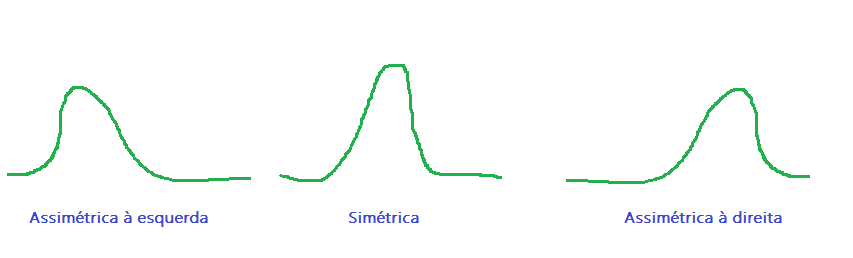

Consideremos, agora, o pequeno conjunto de dados abaixo sobre valores de aluguel. Vamos calcular as medidas de sumarização. Para isso, começaremos importando os pacotes necessários. 

In [1]:
import pandas as pd #para trabalhar com a tabela
import numpy as np #para operações matemáticas e com arrays
import matplotlib.pyplot as plt #para plotagem de gráficos

In [26]:
dados = pd.read_csv('tabela_aluguel.csv')
dados.head(15)

,Tipo,Dormitórios,Banheiros,Garagens,Bairro,Valor
0,Apartamento Padrão,3,1,1,Vila Monteiro,833.75
1,Apartamento Padrão,3,1,1,Centro,5556.25
2,Casa Padrão,3,1,1,Parque dos Timburis,2750.00
3,Apartamento Padrão,2,1,1,Jardim Alvorada,2222.50
4,Apartamento Padrão,2,1,1,Jardim Nova Sao Carlos,903.75
5,Apartamento Duplex,3,6,1,Vila Monteiro (Gleba I),3320.00
6,Apartamento Padrão,2,1,1,Cidade Jardim,1250.00
7,Apartamento Padrão,2,1,1,Residencial Monsenhor Romeu Tortorelli,1250.00
8,Apartamento Padrão,2,1,1,Jardim Ipanema,1000.00
9,Apartamento Kitnet,1,1,1,Jardim Bethânia,695.00


In [38]:
#calculando a média de dormitórios, banheiros, garagens e valor dos aluguéis

media_dorm = dados['Dormitórios'].median()
media_ban = dados['Banheiros'].median()
media_gar = dados['Garagens'].median()
media_valor = round(dados['Valor'].median(),2) #usando round para arredondar o valor em duas casas após a vírgula

print(f"O número médio de dormitórios, banheiros e garagens é, respectivamente {media_dorm, media_ban, media_gar}. Já o valor médio dos aluguéis é R${media_valor}")

O número médio de dormitórios, banheiros e garagens é, respectivamente (2.0, 1.0, 1.0). Já o valor médio dos aluguéis é R$1285.43


In [27]:
#calculando a moda

moda_dorm = dados['Dormitórios'].mode()
moda_ban = dados['Banheiros'].mode()
moda_gar = dados['Garagens'].mode()
moda_valor = dados['Valor'].mode()

moda_dorm, moda_ban, moda_gar, moda_valor

(0    2
 Name: Dormitórios, dtype: int64,
 0    1
 Name: Banheiros, dtype: int64,
 0    1
 Name: Garagens, dtype: int64,
 0    1250.0
 Name: Valor, dtype: float64)

In [40]:
#calculando a mediana

median_dorm = dados['Dormitórios'].median()
median_ban = dados['Banheiros'].median()
median_gar = dados['Garagens'].median()
median_valor = dados['Valor'].median()

print(f"As medianas para dormitórios, banheiros, garagens e valor de aluguel são, respectivamente {median_dorm}, {median_ban}, {media_gar}, R${media_valor}")

As medianas para dormitórios, banheiros, garagens e valor de aluguel são, respectivamente 2.0, 1.0, 1.0, R$1285.43


In [34]:
#calculando quantis para os valores de aluguel

q1 = round(dados['Valor'].quantile(q = 0.25),2)
q2 = round(dados['Valor'].quantile(q = 0.5),2)
q3 = round(dados['Valor'].quantile(q = 0.75),2)

print(f"O valor de 25% dos aluguéis é de R$ {q1}. \n O valor de 50% dos aluguéis é de R$ {q2}. \n O valor de 75% dos aluguéis é de R$ {q3}.")

O valor de 25% dos aluguéis é de R$ 1062.81. 
 O valor de 50% dos aluguéis é de R$ 1285.43. 
 O valor de 75% dos aluguéis é de R$ 2892.5.


Agora, trataremos de *medidas de dispersão*. Estas são medidas que quantificam a magnitude da variabilidades dos dados. São elas:

- <span style = "color:green"> **Amplitude** </span>: expressa a magnitude do intervalo em que os valores são observados, sendo definida pela diferença entre o maior e o menor valor do conjunto de dados. Sejam $x_{1}, x_{2}, ..., x_{n}$, ordenados em ordem crescente, então temos que a amplitude é dada por: $A = x_{n} - x{1}$. É importante notar que os valores extremos afetam diretamente a amplitude e que ela não considera valores no interior do conjunto, de modo que qualquer variação nestes valores passará despercebida pela amplitude.

- <span style = "color:green"> **Variância** </span>: é dada pelo valor médio dos desvios quadráticos com respeito à media. Sejam $x_{1}, x_{2}, ..., x_{N}$ os valores que uma variável pode assumir. A variância populacional é definida como: $\sigma^{2}
 = \frac{\sum_{i=1}^{N}(x_{i} - \mu)^{2}}{N}$. Caso seja a variâcia amostral, temos $s^{2}
 = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1}$. É uma medida sensível a valores de magnitudes discrepantes, ou seja, se o conjunto contiver valores muito altos ou muito baixos, a variância vai trazer essa discrepância.

- <span style = "color:green"> **Desvio-padrão** </span>: indica a variação dos valores em relação ao valor médio. É dado pela raiz quadrada da variância. O desvio padrão amostral é definido como: $s = \sqrt{\frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1}}$. Um desvio padrão pequeno indica que os valores da variável em estudo estão concentrados em torno da média, portanto sem grandes variações. Já um desvio padrão alto indica que os valores estão distribuídos distantes da média, com grande variação.

- <span style = "color:green"> **Coeficiente de variação de Pearson** </span>: é uma medida de dispersão relativa usada quando há interesse em comparar a variabilidade de 2 ou mais variáveis. É dado por: $CV_{P} = \frac{\sigma}{\mu} \times 100\%$ para uma população e $CV_{A} = \frac{s}{\bar{x}} \times 100\%$ para uma amostra. O que este coeficiente indica é que, quanto menor ele for, menos variabilidades nos dados, pois o desvio padrão é pequeno; quanto maior, maior variabilidade nos dados, pois o desvio padrão é alto. Assim, podemos dizer que: $CV < 20\%$ -> variação grande; $CV \le 10\%$ -> variação pequena; $10\% < CV \le 20\%$ -> variação intermediária. Obs.: ao dividir o desvio padrão pela média, relativizamos o coeficiente de variação e podemos comparar a variação de duas variáveis, ainda que elas apresentem valores em ordens diferentes.

 


Vamos calcular o desvio padrão para os valores de aluguéis da tabela:

In [37]:
std_valor = round(dados['Valor'].std(),2)
print(f"O desvio-padrão dos valores de aluguel é de R${std_valor}.")

O desvio-padrão dos valores de aluguel é de R$3283.07.


Podemos ver que o desvio padrão é muito alto, considerando que a média dos preços dos aluguéis é de R$ 1285.43. Isso se deve ao fato de que, na tabela, há um valor muito alto de aluguel, de R$ 13890, demonstrando a alta variabilidade dos preços.

### 1.2 Agrupamento de dados

Uma maneira sistemática de sintetizar o comportamento geral de grandes quantidades de valores é a construção de uma *tabela de frequências*. O número k de classes é dado pela Regra de Sturges: $k = 1 + 3.322 \times \log(n)$. 

Uma vez definido o número de classes, precisamos definir a amplitude h das classes, que é dada por: $h = \frac{A}{k-1}$, onde A é a amplitude total dos dados.

Já o limite inferior da primeira classe é dado por: $LI_{1} = x_{min} - h/2$. Para as outras classes, temos que o limite inferior é dado por $LI_{i} = LI_{1} + i\times h$, para $i = 2, 3, ..., k$.

A frequência absoluta de uma classe é a quantidade de elementos que a classe contém. Já a frequência acumulada é o acúmulo de elementos contidos até a classe em questão, sendo que, ao final, devemos obter o número total de elementos do conjunto de dados. 

Finalmente, podemos dizer que a organização dos dados em uma tabela de frequências estrutura-os de modo que a percepção do seu comportamento se torne mais intuitiva.

### 1.3 Representação gráfica

As representações gráficas de dados permitem compreender a distribuição, realizar comparações e extrair relações entre grupos de informações. Cada tipo de variável exige uma representação gráfica apropriada.

Dentre as muitas técnicas para se representar variáveis **qualitativas**, vamos destacar:
- Gráfico de barras: é utilizado para representar a frequência de variáveis categóricas ou valores agregados de variáveis quantitativas divididas em categorias. Um dos eixos contém a frequência e o outro contém as categoriais. 

- Gráfico de setores (pizza): é utilizado para representar frequências absolutas ou relativas associadas às categorias, por meio da divisão em setores circulares proporcionais a estas frequências. É recomendado seu uso somente quando a variável categórica tem poucas categorias.

- Gráfico de retângulos: é a versão "empilhada" de um gráfico de barras, onde cada barra é dividida proporcionalmente de acordo com a frequência de cada categoria. Podemos representar as barras em uma escala de 0 a 100% e entendermos melhor como cada frequência se distribui para cada categoria. 

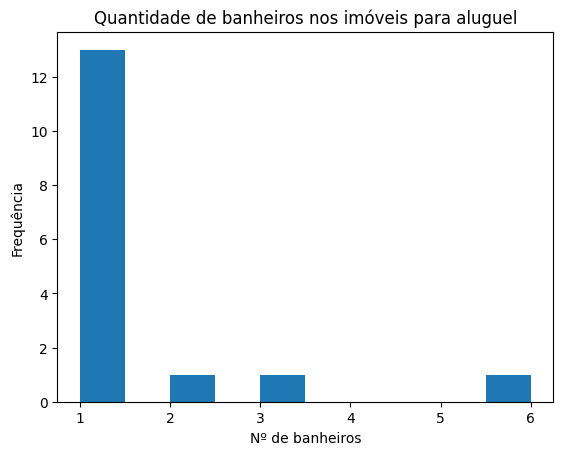

In [47]:
#gráfico de barras 

plt.hist(dados['Banheiros'])
plt.title('Quantidade de banheiros nos imóveis para aluguel')
plt.xlabel('Nº de banheiros')
plt.ylabel('Frequência')
plt.show()

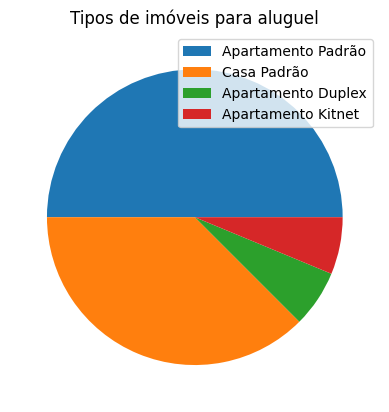

In [68]:
#gráfico de setores (pizza ou pie chart)

labels = dados['Tipo'].unique()
sizes = [dados.Tipo[dados['Tipo']=='Apartamento Padrão'].count(), dados.Tipo[dados['Tipo']=='Casa Padrão'].count(), 
    dados.Tipo[dados['Tipo']=='Apartamento Duplex'].count(), dados.Tipo[dados['Tipo']=='Apartamento Kitnet'].count()]
plt.pie(sizes)
plt.legend(labels)
plt.title('Tipos de imóveis para aluguel')
plt.show()

Dentre as técnicas utilizadas para representar variáveis **quantitativas**, podemos destacar:
- Histogramas: é uma representação gráfica da tabela de frequências de uma variável contínua. 
- Funções de densidade
- Boxplots: representação gráfica que contem vários aspectos da variável em estudo, tais como valor mínimo, quantis, mediana e valor máximo.

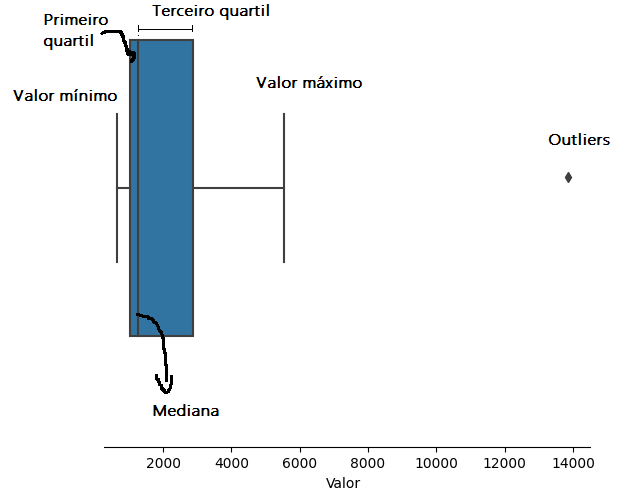


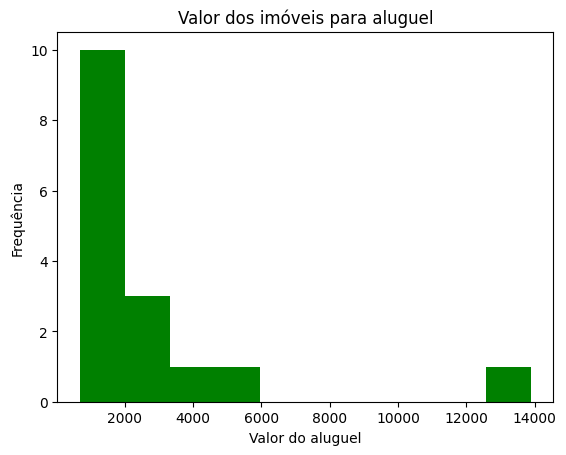

In [71]:
#histograma

plt.hist(dados['Valor'], color='green')
plt.title('Valor dos imóveis para aluguel')
plt.xlabel('Valor do aluguel')
plt.ylabel('Frequência')
plt.show()

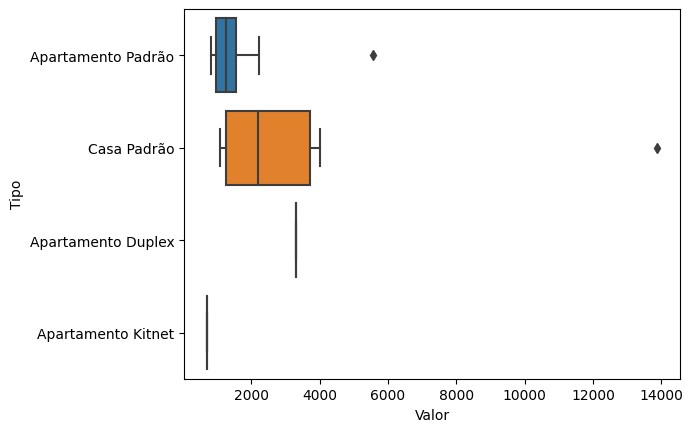

In [87]:
#boxplot usando seaborn 

import seaborn as sns 

sns.boxplot(data = dados, x = 'Valor', y = 'Tipo')
plt.show()